In [1]:
import math
import numpy as np

In [13]:
import matplotlib.pyplot as plt

In [10]:
def sample_gaussian(mu, sigma):
    """
    Generates a sample from a gaussian distibution given a mu and sigma.
        
    Parameters:
    mu (float): mean of the distribution
    sigma (float): standard deviation of the distribution

    Returns:
    float: a sample from a gaussian distribution
    """
    u1, u2 = np.random.rand(), np.random.rand()
    r = np.sqrt(-2 * math.log(u1))
    theta = 2 * math.pi * u2
    z = r * math.cos(theta)
    return mu + z * sigma


def gibbs_sampling_2d(mu, sigma, num_samples, burn_in=100):
    """
    Generates samples from a 2D gaussian distribution using Gibbs sampling.

    Parameters:
        mu: 2D mean vector [mu1, mu2]
        sigma: 2x2 covariance matrix [[sigma1^2, rho*sigma1*sigma2], [rho*sigma1*sigma2, sigma2^2]]
        num_samples: Number of samples to generate
        burn_in: Number of initial samples to discard

    Returns:
        An array of shape (num_samples, 2) with the sampled values
    """
    mu1, mu2 = mu
    sigma1 = np.sqrt(sigma[0, 0])
    sigma2 = np.sqrt(sigma[1, 1])
    rho = sigma[0, 1] / (sigma1 * sigma2)
    
    sigma1_given_2 = sigma1 * np.sqrt(1 - rho**2)
    sigma2_given_1 = sigma2 * np.sqrt(1 - rho**2)

    x1, x2 = 0.0, 0.0
    samples = []
    for _ in range(num_samples + burn_in):
        # Sample x1 given x2
        mu1_given_2 = mu1 + rho * (sigma1 / sigma2) * (x2 - mu2)
        x1 = sample_gaussian(mu1_given_2, sigma1_given_2)

        mu2_given_1 = mu2 + rho * (sigma2 / sigma1) * (x1 - mu1)
        x2 = sample_gaussian(mu2_given_1, sigma2_given_1)

        if _ >= burn_in:
            samples.append([x1, x2])

    return np.array(samples)

Generated samples first 5:
 [[-2.47160935 -1.85091466]
 [-0.89935783  0.09335856]
 [ 1.50887865  1.26038258]
 [ 1.21390937 -0.61064465]
 [-1.06420139  1.00207131]]


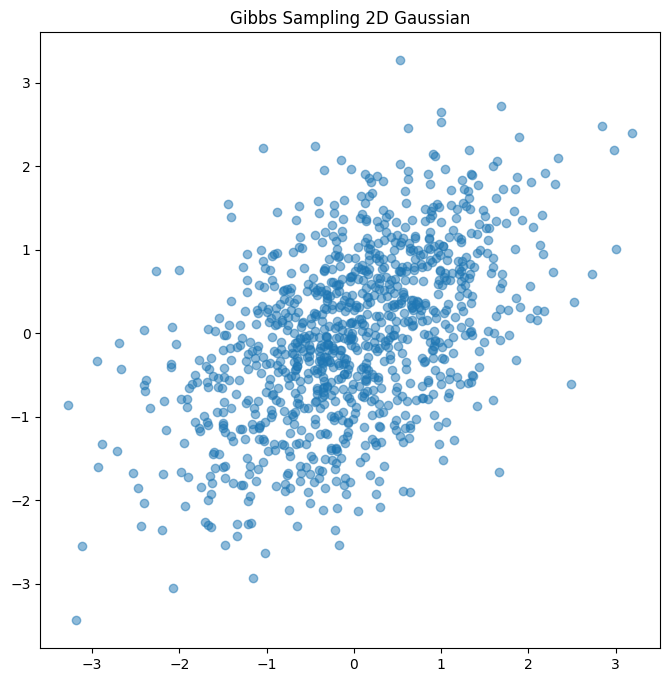

In [14]:
mu = np.array([0, 0])
sigma = np.array([[1, 0.5], [0.5, 1]])
samples = gibbs_sampling_2d(mu, sigma, num_samples=1000)

print("Generated samples first 5:\n", samples[:5])
plt.figure(figsize=(8, 8))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.title("Gibbs Sampling 2D Gaussian")
plt.show()